# 1.4 - Testeo de hipotesis

##### Recordatorio

+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población

# Tamaño de la muestra

https://es.wikipedia.org/wiki/Tama%C3%B1o_de_la_muestra

# Hipótesis

+ **H0**

Hipótesis nula. (H0). H0 es el status quo, el mainstream, la hipótesis a vencer por el investigador.


+ **H1**

Hipótesis alternativa. (H1). H1 es la nueva hipótesis, la del investigador.

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Suposiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite

**3)**

Tamaño adecuado de la muestra. (30)

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la t-Student para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

# Test (estadistico)

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# P-value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$
$$pvalue < umbral => H1$$

El umbral esta determinado por el intervalo de confianza.

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -2, 1) for x in x]
y2=[norm.pdf(x, 2, 1) for x in x]

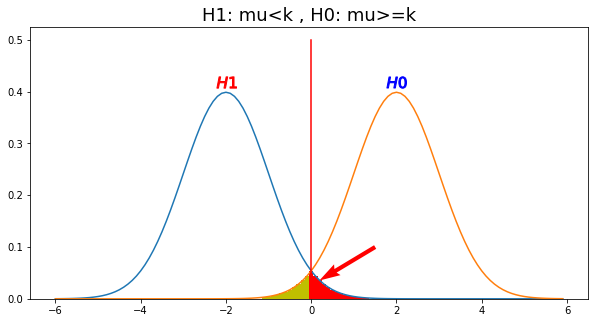

In [3]:
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H1$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H0$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(49, 74):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
    else:
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu<k , H0: mu>=k', fontsize=18);

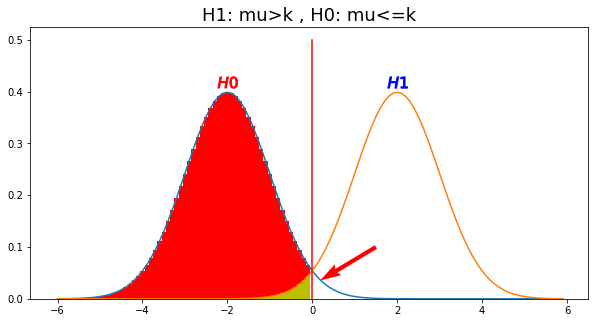

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(74):
    if y1[i]>y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu>k , H0: mu<=k', fontsize=18);

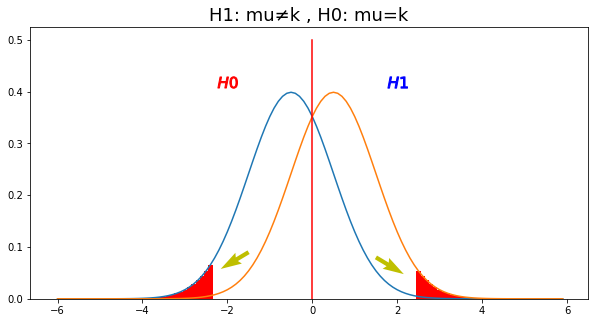

In [5]:
y1=[norm.pdf(x, -.5, 1) for x in x]
y2=[norm.pdf(x, .5, 1) for x in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.08, 1, -0.6, color='y', scale=20)  # para pintar una flecha
plt.quiver(-1.5, 0.09, -1, -0.6, color='y', scale=20)

for i in range(85, 100):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y2[i], width=0.1, color='r')

for i in range(37):
    if y1[i]>=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu≠k , H0: mu=k', fontsize=18);

# Ejemplo estudio farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [6]:
import numpy as np
from scipy.stats import t

In [7]:
# A mano

mu=5.7

mu_hat=5.1     # media del estudio
std_hat=1.6    # std del estudio

n=100

In [8]:
t_test=(mu_hat-mu)/(std_hat/np.sqrt(n))

t_test

-3.750000000000003

In [9]:
dof=n-1   # grados de libertad

dof

99

In [10]:
#help(t)

In [11]:
p_value=t(df=dof).cdf(t_test)

p_value

0.0001489332089038242

In [12]:
# lo mismo, bueno casi....scipy

from scipy.stats import ttest_1samp

In [13]:
pacientes=np.random.normal(5.1, 1.6, 100)

In [14]:
test=ttest_1samp(pacientes, 5.7)

test.statistic

-1.7646626349190653

In [15]:
test.pvalue

0.08070454401860244

**Conclusion:**

Si buscamos un intervalo de confianza del 99,99%, entonces $umbral=0.001$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Ejemplo Altura

Estudio media altura humana, 100 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0?

In [16]:
# A mano

t_test=(1.72-1.7)/(0.2/np.sqrt(100))

p_value=1-t(df=99).cdf(t_test)

p_value

0.15987423706965065

In [17]:
# scipy

test=ttest_1samp(np.random.normal(1.72, 0.2, 100), 1.7)

test.statistic

1.7844394845512725

In [18]:
test.pvalue

0.07741555504883156

**Conclusion**

Si buscamos un intervalo de confianza del 95%, entonces $umbral=0.05$

El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0.

**OJO**

Si buscamos un intervalo de confianza del 80%, entonces $umbral=0.2$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Z-test  

$N(\mu, \sigma)$

supongamos $\sigma=0.25$ , std de la poblacion

In [19]:
from statsmodels.stats import weightstats as w

z_score, p_value=w.ztest(np.random.normal(1.72, 0.25, 100), value=1.7)
print (z_score, p_value)

-0.8905030631595179 0.3731958243670871


# Testeo de hipótesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Por otro lado hay que considerar la independencia de las muestras.

Si son dependientes (matched pairs), entonces se usa el t-test:

+ Welch's t-test


$$t=\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1^2}+\frac{s_2^2}{n_2^2}}}$$

In [20]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

In [21]:
b_pres=pd.read_csv('../data/blood_pressure 2.csv')

b_pres.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [22]:
ttest_rel(b_pres.before, b_pres.after)

Ttest_relResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

In [23]:
ttest_1samp(b_pres.before-b_pres.after, 0)

Ttest_1sampResult(statistic=27.29184176756024, pvalue=7.303035069607835e-48)

**Conclusion**

El p_Value tiende a cero. Podemos rechazar H0.

### independencia

In [24]:
ab_test=pd.read_csv('../data/ab_test.csv')

ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [25]:
ttest_ind(ab_test.a, ab_test.b)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [26]:
ttest_ind(ab_test.a, ab_test.b, equal_var=True)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

In [27]:
ttest_ind(ab_test.a, ab_test.a)

Ttest_indResult(statistic=0.0, pvalue=1.0)

**Test de independencia**

+ H0 : Completa dependencia (son lo mismo)
+ H1 : son independientes


**Conclusion**

Son independientes, el pvalor es menor que el umbral, por lo que podemos rechazar H0.
Al ser independientes, ya no se usa el t-test, se usa el z-test.

In [28]:
z_score, p_value=w.ztest(ab_test.a, ab_test.b,
                         value=0, 
                         alternative='two-sided',
                         usevar='pooled',
                         ddof=1)

print (z_score, p_value)

-2.637533181209767 0.008351145504323936


**Conclusion**

El p_value es menor que el umbral, dependiendo del intervalo de confianza, pero siendo asi podemos rechazar H0, y decir que existe una diferencia significativa entre ambas muestras, una pagina web funciona mejor que otra.